In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from PIL import Image
from plot import make_plots
import glob

In [2]:
def plot_proportions(random=False):
    no_neither = []
    neither = []
    restricted = []
    alphas = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
    for alpha in alphas:
        alpha = str(alpha)
        if not random:
            results_dir = 'myresults/classification/resnet50/alpha_{}/'.format(alpha)
        else:
            results_dir = 'myresults/classification/resnet50_random/alpha_{}/'.format(alpha)
        df = pd.read_csv(results_dir + 'proportions_avg.csv')
        no_neither.append(df.loc[0, 'Shape Match Closer'])
        neither.append(df.loc[1, 'Shape Match Closer'])
        restricted.append(df.loc[2, 'Shape Match Closer'])
    
    plt.plot(alphas, no_neither, '-o', label='No Neither')
    plt.plot(alphas, neither, '-o', label='Neither')
    plt.plot(alphas, restricted, '-o', label='Restricted')
    plt.yticks(np.arange(0, 1.1, 0.1))
    plt.legend()
    plt.show()

In [5]:
def plot_proportions_triplets(random=False):
    avg_shape_bias = []
    alphas = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
    for alpha in alphas:
        alpha = str(alpha)
        if not random:
            results_dir = 'myresults/triplets/resnet50/alpha_{}/'.format(alpha)
        else:
            results_dir = 'myresults/triplets/resnet50_random/alpha_{}/'.format(alpha)
        shape_matches = 0
        total = 0
        # results = []
        for result_f in glob.iglob(results_dir + '*.csv'):
            df = pd.read_csv(result_f)
            # results.append(df['Shape Match Closer'].sum()/len(df))
            rslt_df = df[df['Metric'] == 'cos'] 
            shape_matches += rslt_df['Shape Match Closer'].sum()
            total += len(rslt_df)
        avg_shape_bias.append(shape_matches / total)
        # avg_shape_bias.append(np.mean(results))
    plt.plot(alphas, avg_shape_bias, '-o')
    plt.yticks(np.arange(0, 1.1, 0.1))
    plt.show()
        

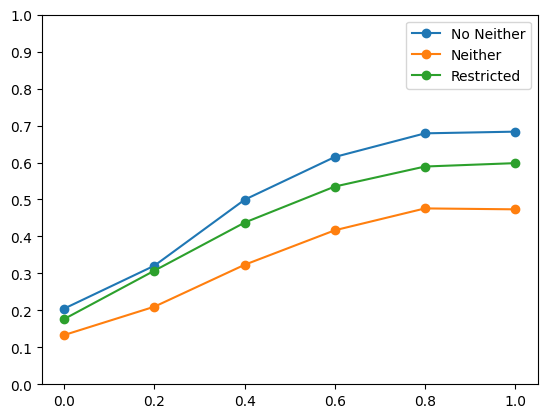

In [31]:
plot_proportions(random=False)

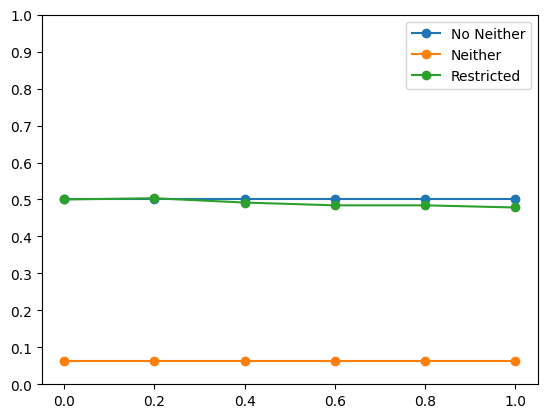

In [32]:
plot_proportions(random=True)

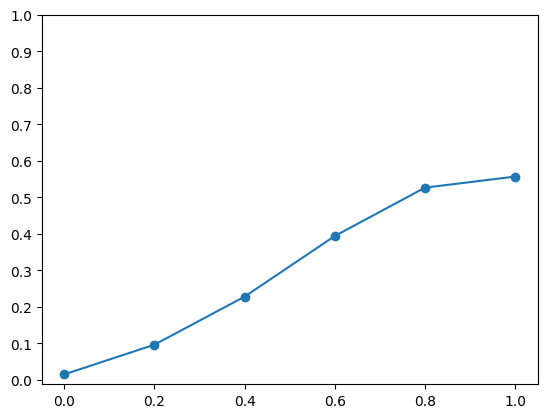

In [6]:
plot_proportions_triplets(random=False)

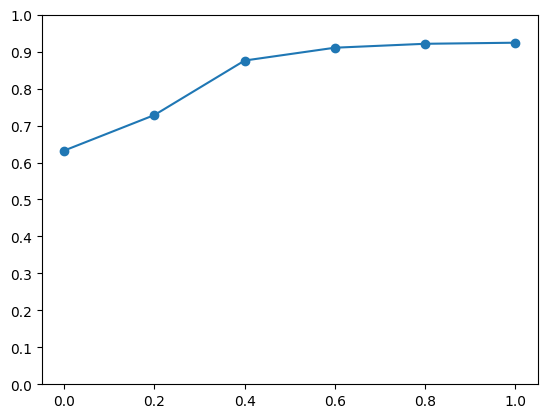

In [7]:
plot_proportions_triplets(random=True)